# HR Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.shape

(54808, 14)

In [3]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [5]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
# Summarise categorical values
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


### Treating Missing Values

In [8]:
df['previous_year_rating'].fillna(value=df['previous_year_rating'].mean(), inplace=True)

In [9]:
df['education'] = df['education'].fillna("Bachelor's")

In [10]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Categorical Into Continuous

### Fitting Label Encoder

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

In [13]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


### Applying Logistic Regression

In [14]:
x = df.drop('is_promoted', axis=1)
y = df['is_promoted']

In [ ]:
## x.shape
## y.shape

In [15]:
## Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [16]:
## Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
## Predicting the test results

y_pred = classifier.predict(x_test)

## Evaluation 

In [18]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[15061     0]
 [ 1382     0]]


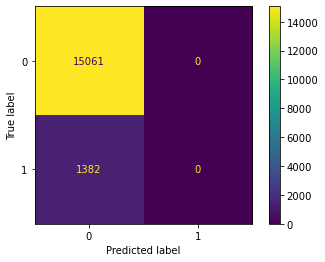

In [19]:
## for plotting Confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)

#### Accuracy



In [20]:
## Test Accuracy

from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.9159520768716171


In [21]:
## Train Accuracy

y_train_pred = classifier.predict(x_train)
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))

Train Accuracy:  0.9143490160302359


#### Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15061
           1       0.00      0.00      0.00      1382

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.88     16443



C:\Users\AncSoftware\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### AUC

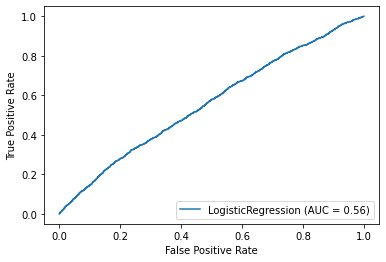

In [23]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,x_test,y_test)
plt.show()

###  Applying Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 101)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=101)

In [ ]:
classifier.fit(x_train, y_train)

In [40]:
## Predicting the results

y_pred = classifier.predict(x_test)

#### Evaluation

In [41]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[14968    93]
 [ 1003   379]]


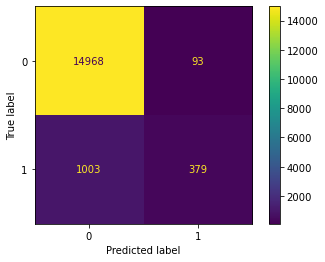

In [42]:
## for plotting Confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)

##### Accuracy

In [43]:
## Test Accuracy

from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.9333454965638873


In [44]:
## Train Accuracy

y_train_pred = classifier.predict(x_train)
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))

Train Accuracy:  0.996585429427864


##### Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15061
           1       0.80      0.27      0.41      1382

    accuracy                           0.93     16443
   macro avg       0.87      0.63      0.69     16443
weighted avg       0.93      0.93      0.92     16443



##### AUC

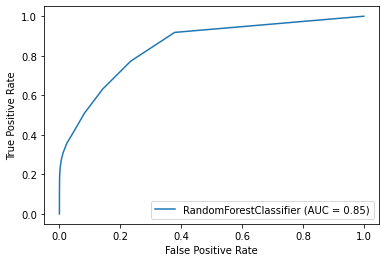

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,x_test,y_test)
plt.show()

# Implimenting Random Forest on test data set

#### Load the dataset

In [47]:
test = pd.read_csv('test.csv')
test.shape

(23490, 13)

In [49]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [50]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [52]:
# Summarise categorical values
test.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,16596,13078


#### Treating missing values

In [54]:
test['previous_year_rating'].fillna(value=test['previous_year_rating'].mean(), inplace=True)

In [53]:
test['education'] = test['education'].fillna("Bachelor's")

In [55]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Categorical into Continuous data

#### Fitting Label Encoder

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [57]:
for i in range(0, test.shape[1]):
    if test.dtypes[i]=='object':
        test[test.columns[i]] = le.fit_transform(test[test.columns[i]])

In [58]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.339146,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.000000,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.000000,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.000000,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.000000,7,0,0,61


### Predicting the Result

In [59]:
y_test_pred = classifier.predict(test)

In [60]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
y_test_pred.shape

(23490,)

###  Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
classifier.fit(x_train, y_train)

##### Visualise The Tree

##### Predicting the results

In [ ]:
y_pred = classifier.predict(x_test)

##### Evaluation 

##### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
## for plotting Confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)

##### Accuracy

In [ ]:
## Test Accuracy

from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

In [ ]:
## Train Accuracy

from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_train,y_train_pred))

##### Classification Report

In [ ]:
## Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

##### AUC

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,x_test,y_test)
plt.show()

#### Feature Importance

In [ ]:
classifier.feature_importances_

#### Reporting model results

In [ ]:
def report_model(model):
    model_pred = model.predict(x_test)
    print(classification_report(y_test,model_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)